In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
from tqdm import *
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import corner

from scipy.linalg import eigh


from sklearn.preprocessing import StandardScaler




# Set up some parameters for pretty plots
plt.rcParams.update({
    'figure.dpi': 200,
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.family": "serif",
    "font.size": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.max_open_warning": False,
})


# Finding the right parameter for side-band

In [3]:
# Load calssified data
class_df = pd.read_hdf('../notebooks/test_gd1/df_test.h5')
# Load all data

interest_vars=['ϕ', 'λ', 'μ_ϕcosλ', 'μ_λ', 'b-r', 'g']  # all trainable params
intuitive_vars=['ϕ', 'λ']                               # Stream looks clean on those vars
toy_vars=['ϕ', 'λ', 'μ_λ']                              # Toy problem
stream_inds=class_df['stream']                          # 'Ground Truth'
nn_score_inds=class_df['nn_score']>0.7                  # 80% of NN score



# Centering around entire data

### Simplified 2D example

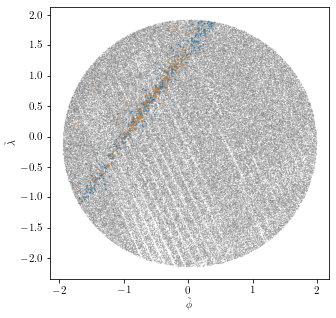

In [3]:
# Stadardaize data
scaler = StandardScaler()
standardized_design = scaler.fit_transform(class_df[intuitive_vars])

# Plot labeled vs ground truth
plt.figure(figsize=(5,5))
plt.scatter(*standardized_design.T,c='gray',alpha=0.3,s=0.05)
plt.scatter(*standardized_design[stream_inds].T,alpha=0.5,s=0.8)
plt.scatter(*standardized_design[nn_score_inds].T,alpha=0.5,s=0.8)
plt.xlabel('$\\tilde{\phi}$')
plt.ylabel('$\\tilde{\lambda}$')
plt.show()

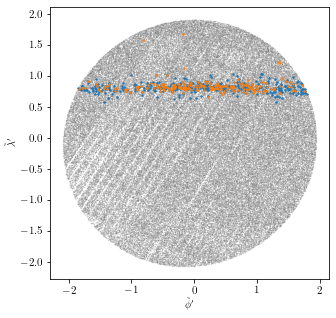

In [4]:
# Find covariance and eigenvalues.
standardized_design_nn=standardized_design[nn_score_inds]
design_nn_cov=np.cov(standardized_design_nn.T)
eigenvalues_nn, eigenvectors_nn = np.linalg.eig(design_nn_cov)
sorted_indices_nn = np.argsort(eigenvalues_nn)[::-1]

# Sort the eigenvalues and eigenvectors, the eigen vectors matrix is the matrix rotating to the new coordinate system.
sorted_eigenvalues_nn = eigenvalues_nn[sorted_indices_nn]
sorted_eigenvectors_nn =np.array([[-1,0],[0,1]]) @ eigenvectors_nn[:, sorted_indices_nn]


plt.figure(figsize=(5,5))
plt.scatter(*sorted_eigenvectors_nn @ standardized_design.T,c='gray',alpha=0.3,s=0.05)  
plt.scatter(*sorted_eigenvectors_nn @ standardized_design[stream_inds].T,alpha=1,s=2)
plt.scatter(*sorted_eigenvectors_nn @ standardized_design[nn_score_inds].T,alpha=1,s=2)
plt.xlabel('$\\tilde{\phi}\'$')
plt.ylabel('$\\tilde{\lambda}\'$')
plt.show()

### 3D Case

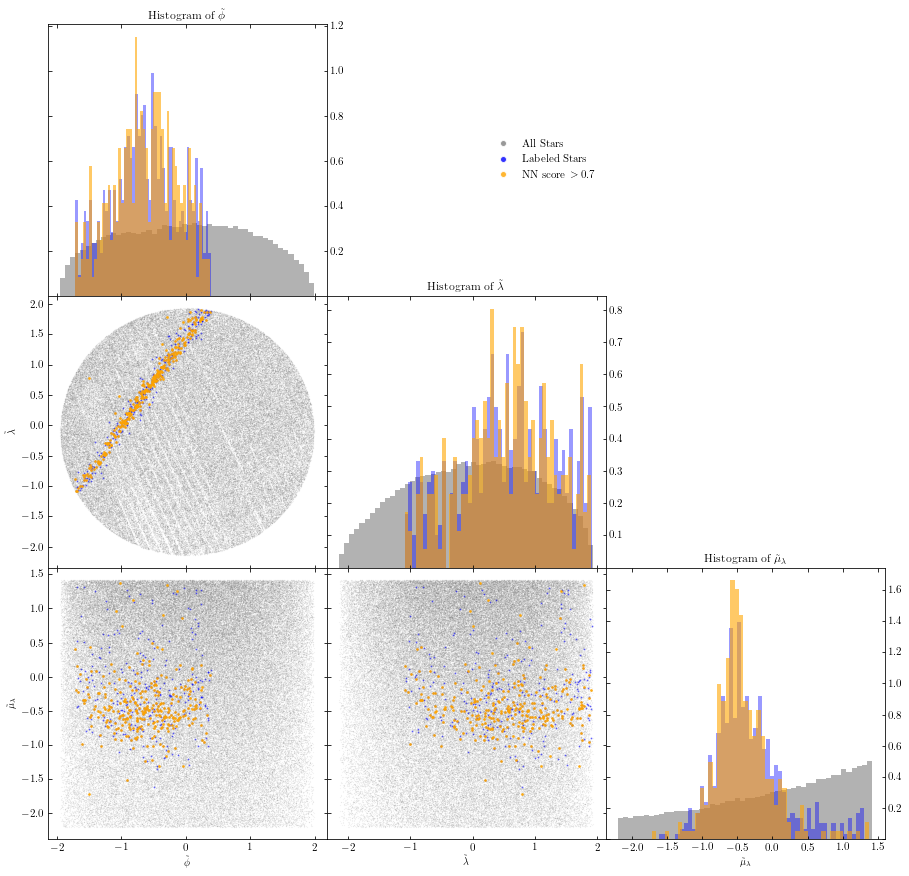

In [28]:
# Stadardaize data
scaler = StandardScaler()
standardized_design = scaler.fit_transform(class_df[toy_vars])

vars=[r'$\tilde{\phi}$', r'$\tilde{\lambda}$', r'$\tilde{\mu}_\lambda$']
corner_plots(standardized_design, vars, nn_score_inds, stream_inds)

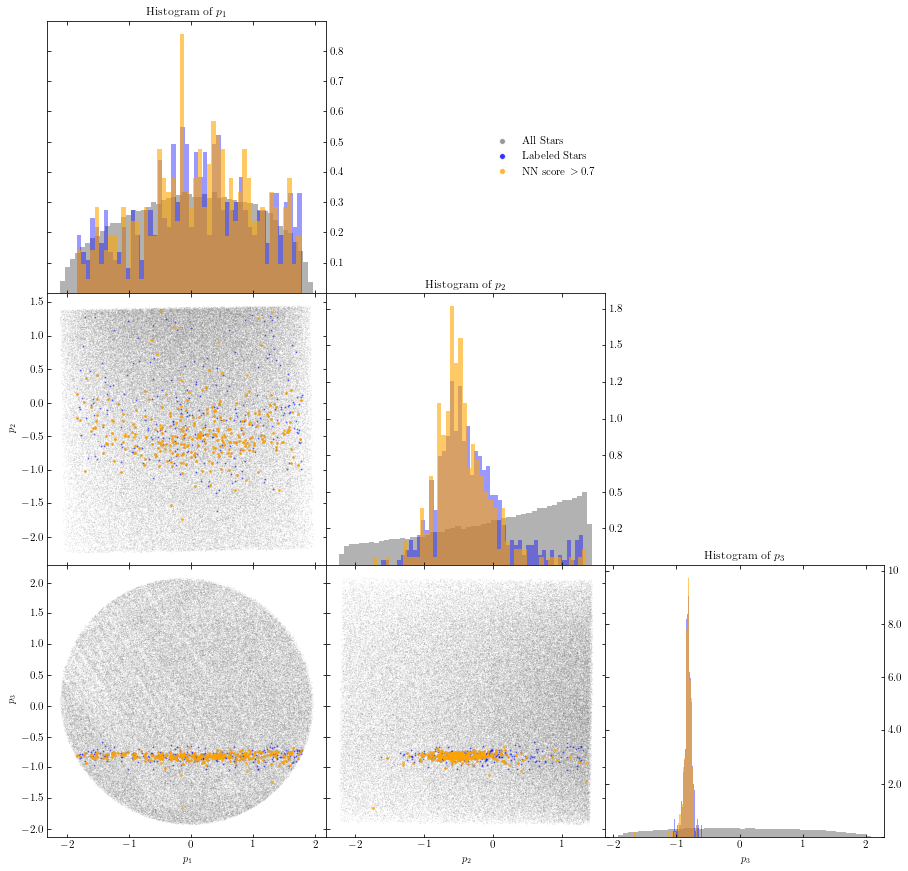

In [29]:
# Find covariance and eigenvalues.
standardized_design_nn=standardized_design[nn_score_inds]
design_nn_cov=np.cov(standardized_design_nn.T)
eigenvalues_nn, eigenvectors_nn = np.linalg.eig(design_nn_cov)
sorted_indices_nn = np.argsort(eigenvalues_nn)[::-1]

# Sort the eigenvalues and eigenvectors, the eigen vectors matrix is the matrix rotating to the new coordinate system.
sorted_eigenvalues_nn = eigenvalues_nn[sorted_indices_nn]
sorted_eigenvectors_nn = eigenvectors_nn[:, sorted_indices_nn]

vars=['$p_1$', '$p_2$', '$p_3$']
corner_plots(standardized_design @ sorted_eigenvectors_nn, vars, nn_score_inds, stream_inds)


### Full 6D

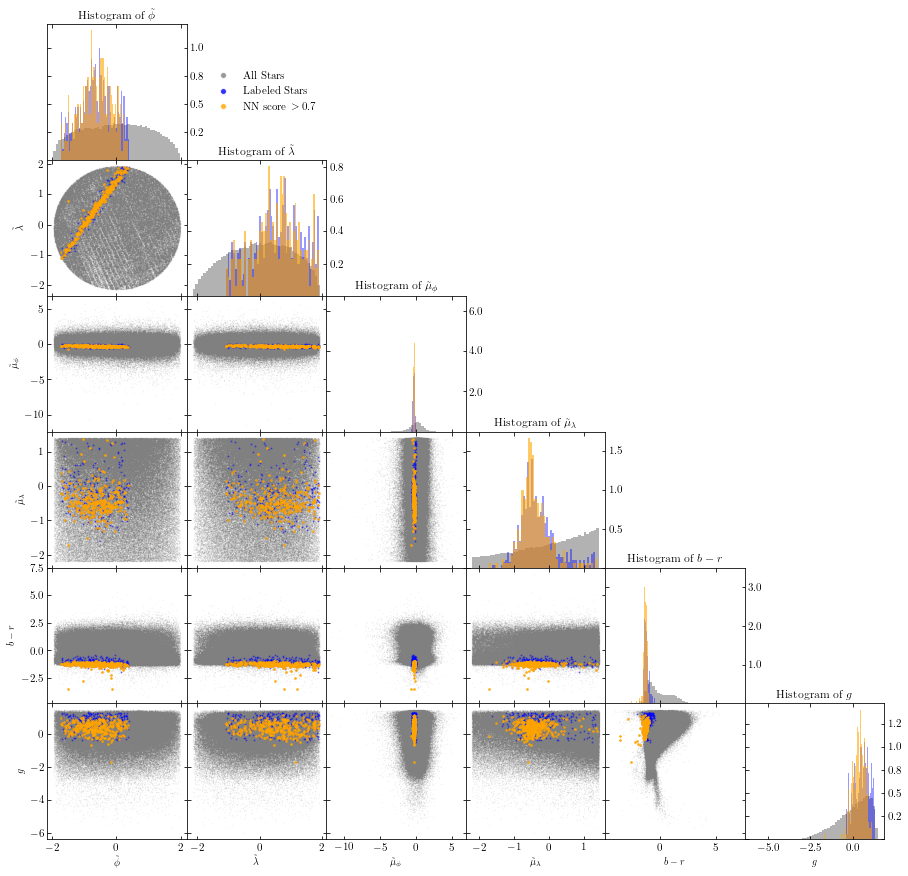

In [30]:
# Stadardaize data
scaler = StandardScaler()
standardized_design = scaler.fit_transform(class_df[interest_vars])
vars=[r'$\tilde{\phi}$', r'$\tilde{\lambda}$', r'$\tilde{\mu}_\phi$', r'$\tilde{\mu}_\lambda$', r'$b-r$', r'$g$']
corner_plots(standardized_design, vars, nn_score_inds, stream_inds)


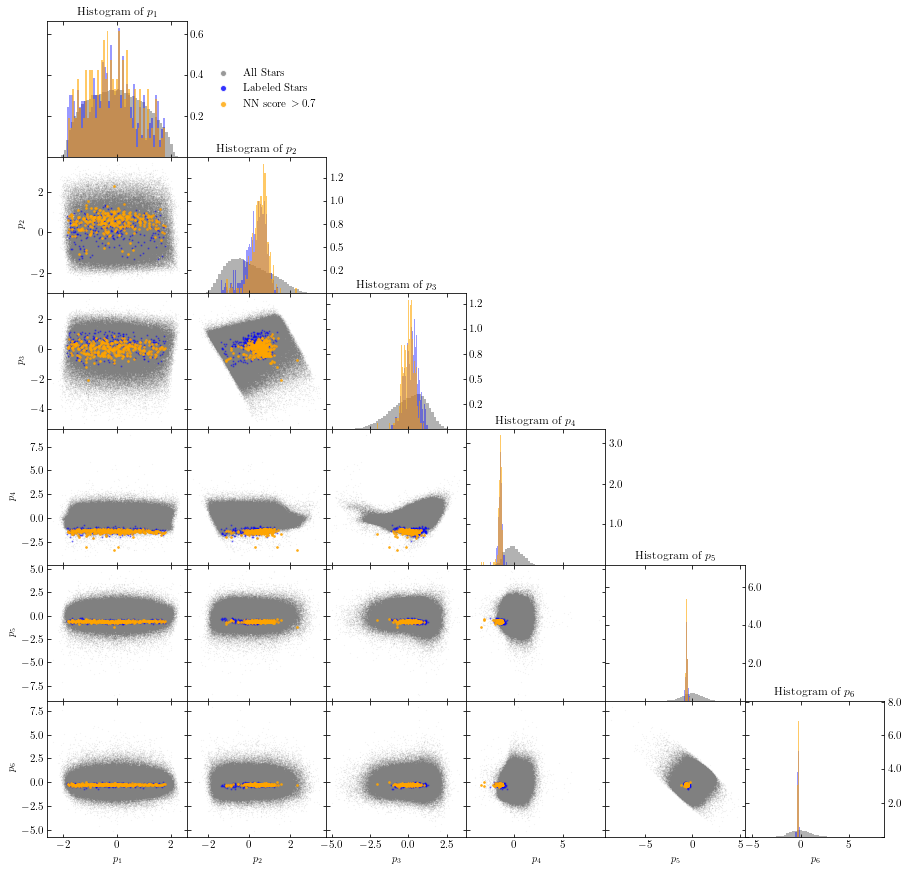

In [31]:
# Find covariance and eigenvalues.
standardized_design_nn=standardized_design[nn_score_inds]
design_nn_cov=np.cov(standardized_design_nn.T)
eigenvalues_nn, eigenvectors_nn = np.linalg.eig(design_nn_cov)
sorted_indices_nn = np.argsort(eigenvalues_nn)[::-1]

# Sort the eigenvalues and eigenvectors, the eigen vectors matrix is the matrix rotating to the new coordinate system.
sorted_eigenvalues_nn = eigenvalues_nn[sorted_indices_nn]
sorted_eigenvectors_nn = eigenvectors_nn[:, sorted_indices_nn]


vars=['$p_1$', '$p_2$', '$p_3$', '$p_4$', '$p_5$', '$p_6$']
corner_plots(standardized_design @ sorted_eigenvectors_nn, vars, nn_score_inds, stream_inds)



# Centering around the stream

### Simplified 2D example

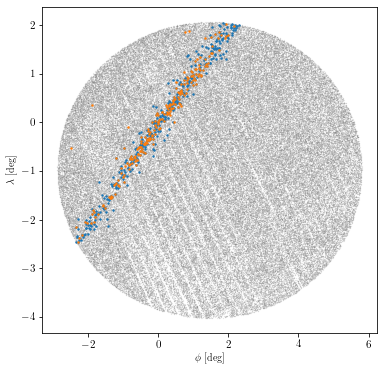

In [6]:
# Stadardaize data
scaler = StandardScaler()
scaler.fit_transform(class_df[intuitive_vars][nn_score_inds])
standardized_design = scaler.transform(class_df[intuitive_vars])

# Plot labeled vs ground truth
plt.figure(figsize=(6,6))
plt.scatter(*standardized_design.T,c='gray',alpha=0.3,s=0.05)
plt.scatter(*standardized_design[stream_inds].T,alpha=1,s=2)
plt.scatter(*standardized_design[nn_score_inds].T,alpha=1,s=2)
plt.xlabel('$\phi$ [deg]')
plt.ylabel('$\lambda$ [deg]')
plt.show()

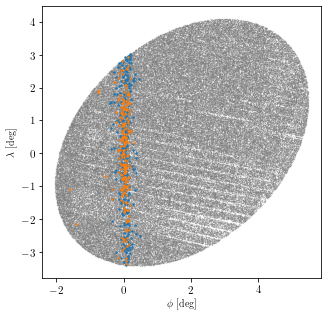

In [18]:
# Find covariance and eigenvalues.
standardized_design_nn=standardized_design[nn_score_inds]
design_nn_cov=np.cov(standardized_design_nn.T)
eigenvalues_nn, eigenvectors_nn = eigh(design_nn_cov)
sorted_indices_nn = np.argsort(eigenvalues_nn)[::-1]

# Sort the eigenvalues and eigenvectors, the eigen vectors matrix is the matrix rotating to the new coordinate system.
sorted_eigenvalues_nn = eigenvalues_nn[sorted_indices_nn]
sorted_eigenvectors_nn = eigenvectors_nn[:, sorted_indices_nn]


plt.figure(figsize=(5,5))
plt.scatter(*sorted_eigenvectors_nn @ standardized_design.T,c='gray',alpha=0.5,s=0.05)
plt.scatter(*sorted_eigenvectors_nn @ standardized_design[stream_inds].T,alpha=1,s=2)
plt.scatter(*sorted_eigenvectors_nn @ standardized_design[nn_score_inds].T,alpha=1,s=2)
plt.xlabel('$\phi$ [deg]')
plt.ylabel('$\lambda$ [deg]')
plt.show()

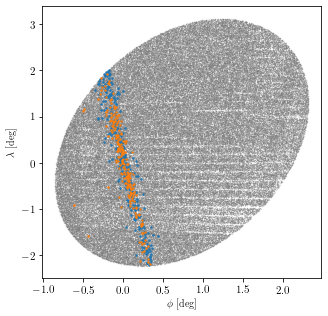

In [19]:
design_cov=np.cov(standardized_design.T)

# Find covariance and eigenvalues for the generalized problem
eigenvalues, eigenvectors = eigh(design_nn_cov, design_cov)
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort the eigenvalues and eigenvectors, the eigen vectors matrix is the matrix rotating to the new coordinate system.
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Visualization
plt.figure(figsize=(5, 5))

# Assuming standardized_design is your data matrix, the following lines will plot it transformed by the sorted eigenvectors
plt.scatter(*(sorted_eigenvectors @ standardized_design.T), c='gray', alpha=0.5, s=0.05)

# Assuming that stream_inds and nn_score_inds are indices for specific subsets, the lines below will plot these subsets
plt.scatter(*(sorted_eigenvectors @ standardized_design[stream_inds].T), alpha=1, s=2)
plt.scatter(*(sorted_eigenvectors @ standardized_design[nn_score_inds].T), alpha=1, s=2)

plt.xlabel('$\phi$ [deg]')
plt.ylabel('$\lambda$ [deg]')
plt.show()


### 3D Case

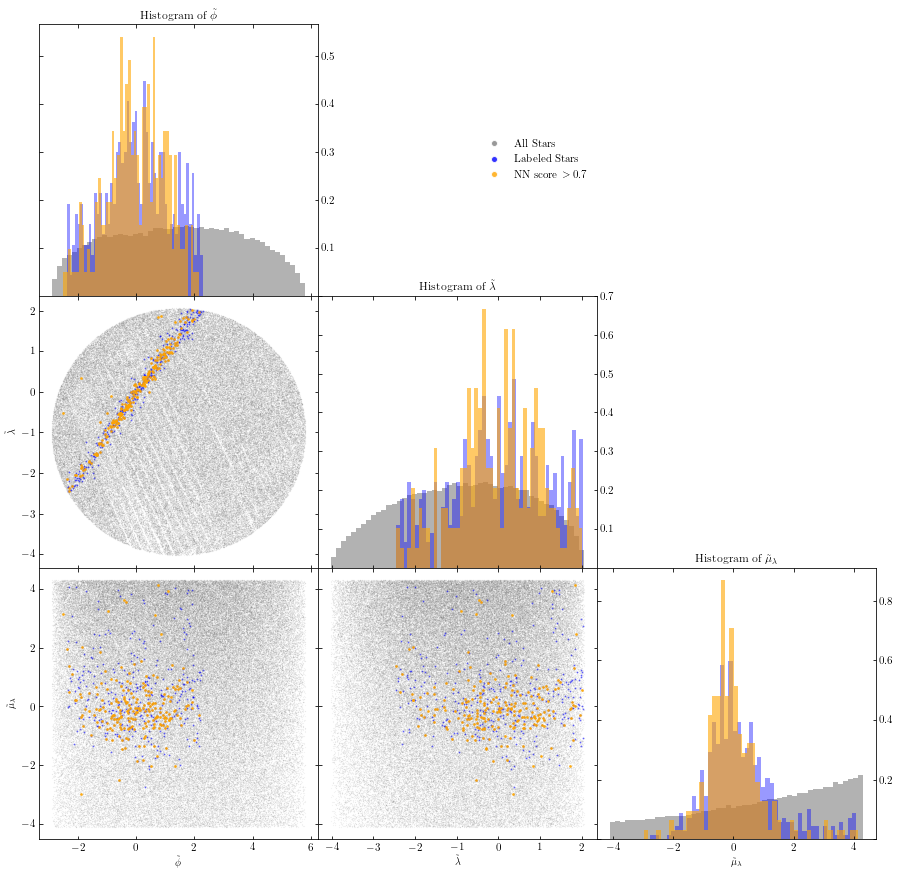

In [20]:
# Stadardaize data
scaler = StandardScaler()
scaler.fit_transform(class_df[toy_vars][nn_score_inds])
standardized_design = scaler.transform(class_df[toy_vars])

vars=[r'$\tilde{\phi}$', r'$\tilde{\lambda}$', r'$\tilde{\mu}_\lambda$']
corner_plots(standardized_design, vars, nn_score_inds, stream_inds)

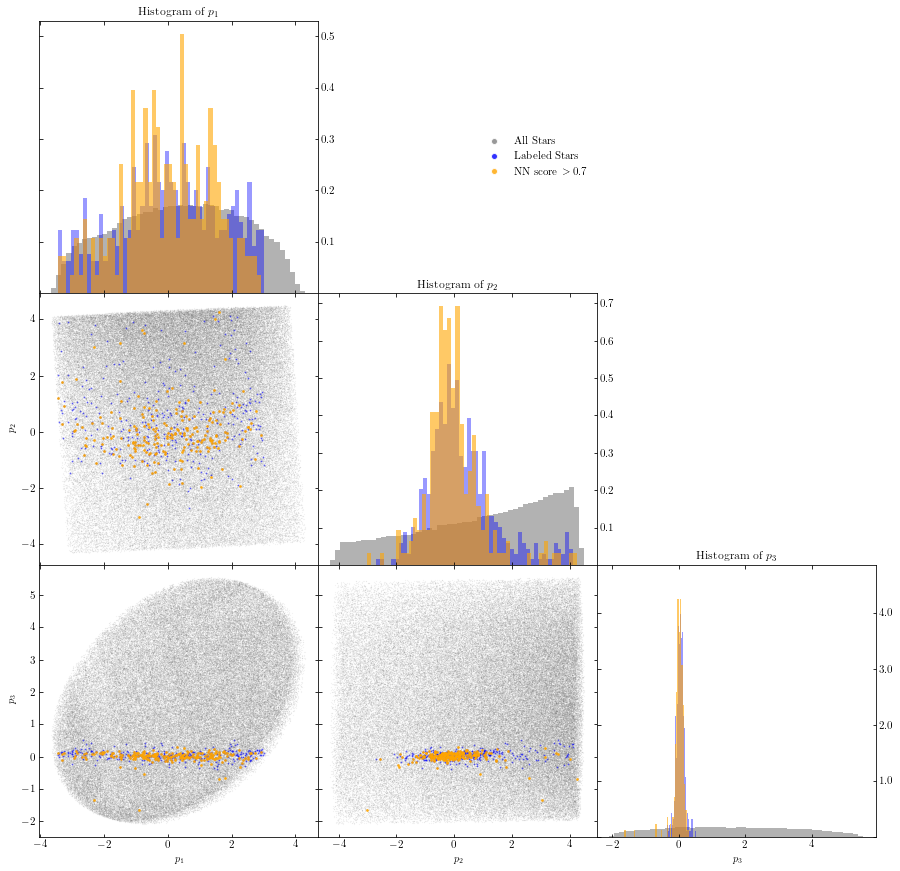

In [21]:
# Find covariance and eigenvalues.
standardized_design_nn=standardized_design[nn_score_inds]
design_nn_cov=np.cov(standardized_design_nn.T)
eigenvalues_nn, eigenvectors_nn = np.linalg.eig(design_nn_cov)
sorted_indices_nn = np.argsort(eigenvalues_nn)[::-1]

# Sort the eigenvalues and eigenvectors, the eigen vectors matrix is the matrix rotating to the new coordinate system.
sorted_eigenvalues_nn = eigenvalues_nn[sorted_indices_nn]
sorted_eigenvectors_nn = eigenvectors_nn[:, sorted_indices_nn]

vars=['$p_1$', '$p_2$', '$p_3$']
corner_plots(standardized_design @ sorted_eigenvectors_nn, vars, nn_score_inds, stream_inds)


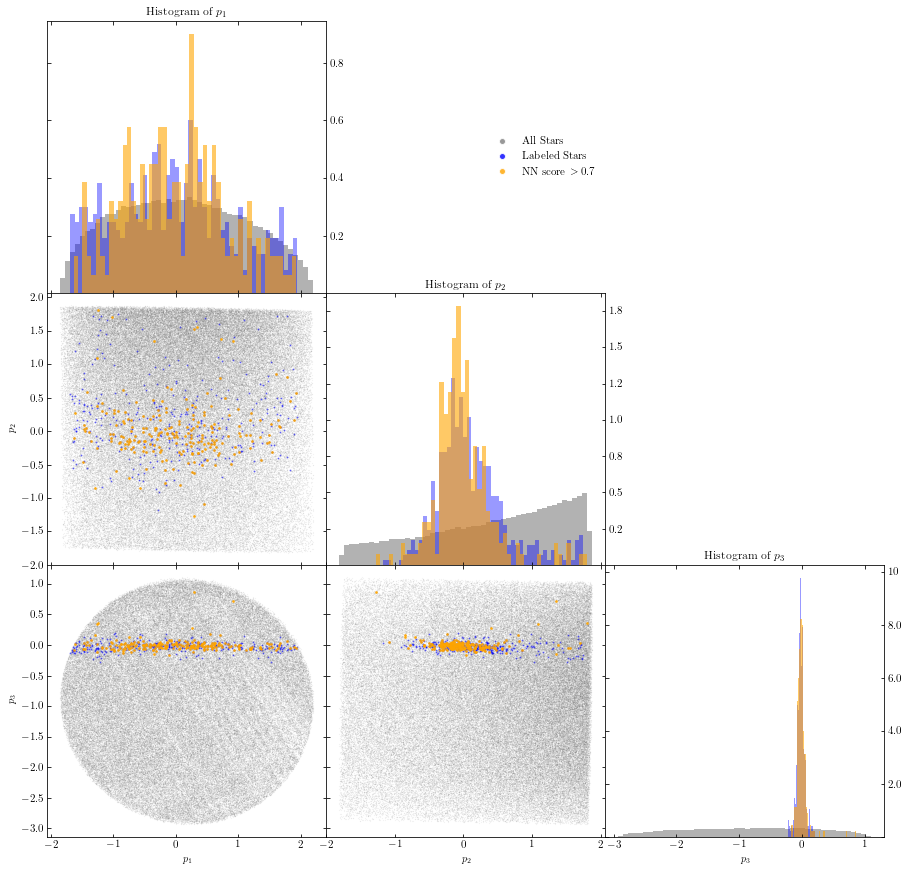

In [23]:
# Find generalzied covariance and eigenvalues.
design_cov=np.cov(standardized_design.T)

eigenvalues_nn, eigenvectors_nn = eigh(design_nn_cov,design_cov)
sorted_indices_nn = np.argsort(eigenvalues_nn)[::-1]

# Sort the eigenvalues and eigenvectors, the eigen vectors matrix is the matrix rotating to the new coordinate system.
sorted_eigenvalues_nn = eigenvalues_nn[sorted_indices_nn]
sorted_eigenvectors_nn = eigenvectors_nn[:, sorted_indices_nn]

vars=['$p_1$', '$p_2$', '$p_3$']
corner_plots(standardized_design @ sorted_eigenvectors_nn, vars, nn_score_inds, stream_inds)


### Full 6D

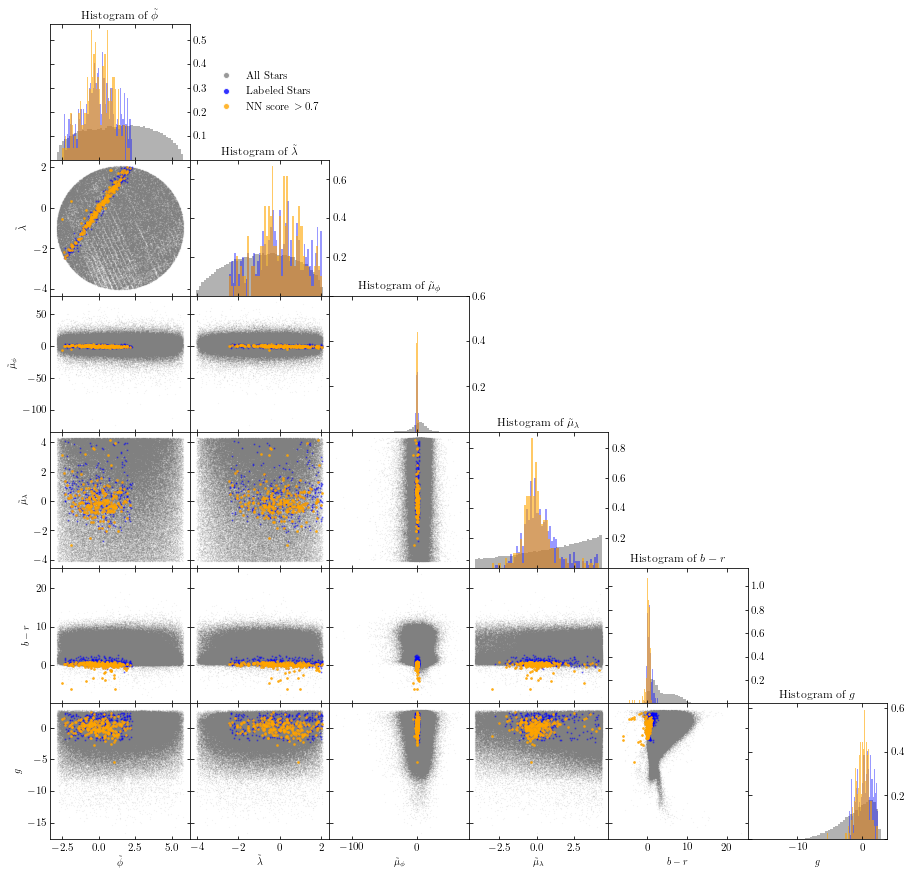

In [24]:
# Stadardaize data
scaler = StandardScaler()
scaler.fit(class_df[interest_vars][nn_score_inds])
standardized_design = scaler.transform(class_df[interest_vars])
vars=[r'$\tilde{\phi}$', r'$\tilde{\lambda}$', r'$\tilde{\mu}_\phi$', r'$\tilde{\mu}_\lambda$', r'$b-r$', r'$g$']
corner_plots(standardized_design, vars, nn_score_inds, stream_inds)


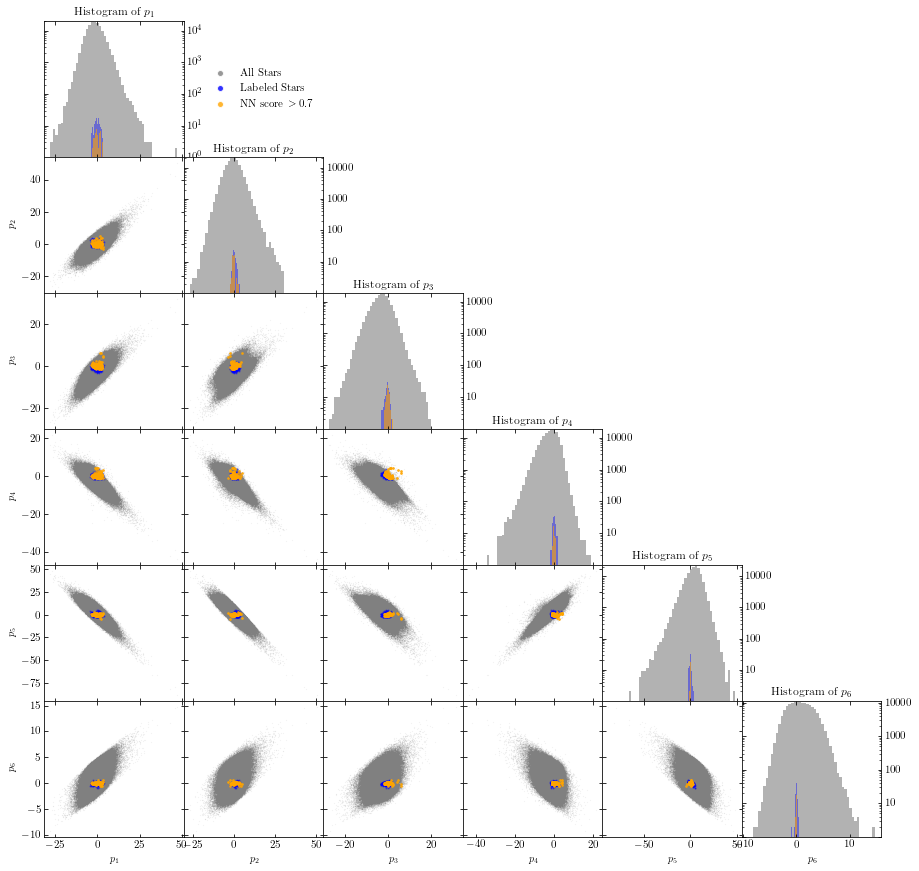

In [27]:
# Find covariance and eigenvalues.
standardized_design_nn=standardized_design[nn_score_inds]
design_nn_cov=np.cov(standardized_design_nn.T)
eigenvalues_nn, eigenvectors_nn = np.linalg.eig(design_nn_cov)
sorted_indices_nn = np.argsort(eigenvalues_nn)[::-1]

# Sort the eigenvalues and eigenvectors, the eigen vectors matrix is the matrix rotating to the new coordinate system.
sorted_eigenvalues_nn = eigenvalues_nn[sorted_indices_nn]
sorted_eigenvectors_nn = eigenvectors_nn[:, sorted_indices_nn]


vars=['$p_1$', '$p_2$', '$p_3$', '$p_4$', '$p_5$', '$p_6$']
corner_plots(standardized_design @ sorted_eigenvectors_nn, vars, nn_score_inds, stream_inds, density=False)



In [36]:
eigh(design_cov)[0],eigh(design_nn_cov)[0],sorted_eigenvalues_nn

(array([  2.22038671,   3.78557941,   4.98121147,   5.4374069 ,
         10.81074608, 122.62272235]),
 array([0.0175585 , 0.59507084, 0.8307897 , 1.07863327, 1.19917943,
        2.30641802]),
 array([0.66185282, 0.22684564, 0.17963662, 0.10272486, 0.01077153,
        0.00287534]))

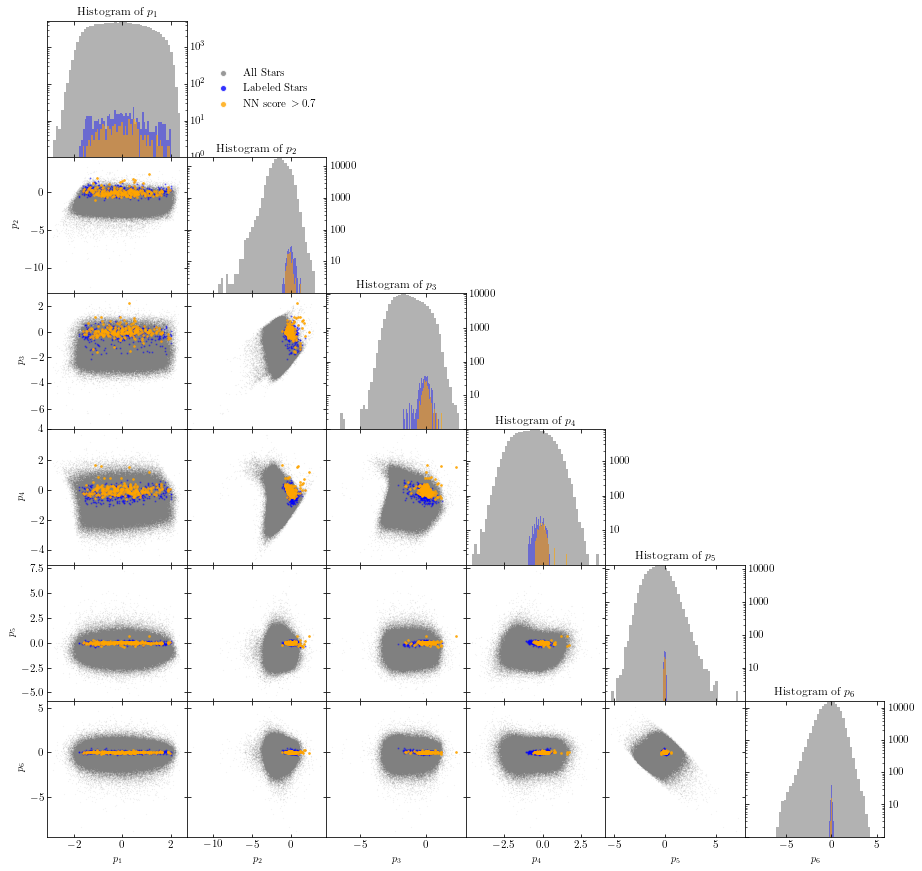

In [35]:
# Find generalzied covariance and eigenvalues.
design_cov=np.cov(standardized_design.T)

eigenvalues_nn, eigenvectors_nn = eigh(design_nn_cov,design_cov)
sorted_indices_nn = np.argsort(eigenvalues_nn)[::-1]

# Sort the eigenvalues and eigenvectors, the eigen vectors matrix is the matrix rotating to the new coordinate system.
sorted_eigenvalues_nn = eigenvalues_nn[sorted_indices_nn]
sorted_eigenvectors_nn = eigenvectors_nn[:, sorted_indices_nn]


vars=['$p_1$', '$p_2$', '$p_3$', '$p_4$', '$p_5$', '$p_6$']
corner_plots(standardized_design @ sorted_eigenvectors_nn, vars, nn_score_inds, stream_inds, density=False)



# Doing the analysis on a new parameter

In [37]:
# Original data
df = pd.read_hdf("../gaia_data/gd1_1_patch.h5")

Scanning over p6
Sideband region: [-0.4,-0.1) & (0.2,0.4]
Signal region: [-0.1,0.2]
Total counts: SR = 121,325, SB = 198,136
Signal region has 456 stream and 120,869 bkg events (0.38%).
Sideband region has 61 stream and 198,075 bkg events (0.03%).
f_sig = 12.3X f_sideband.


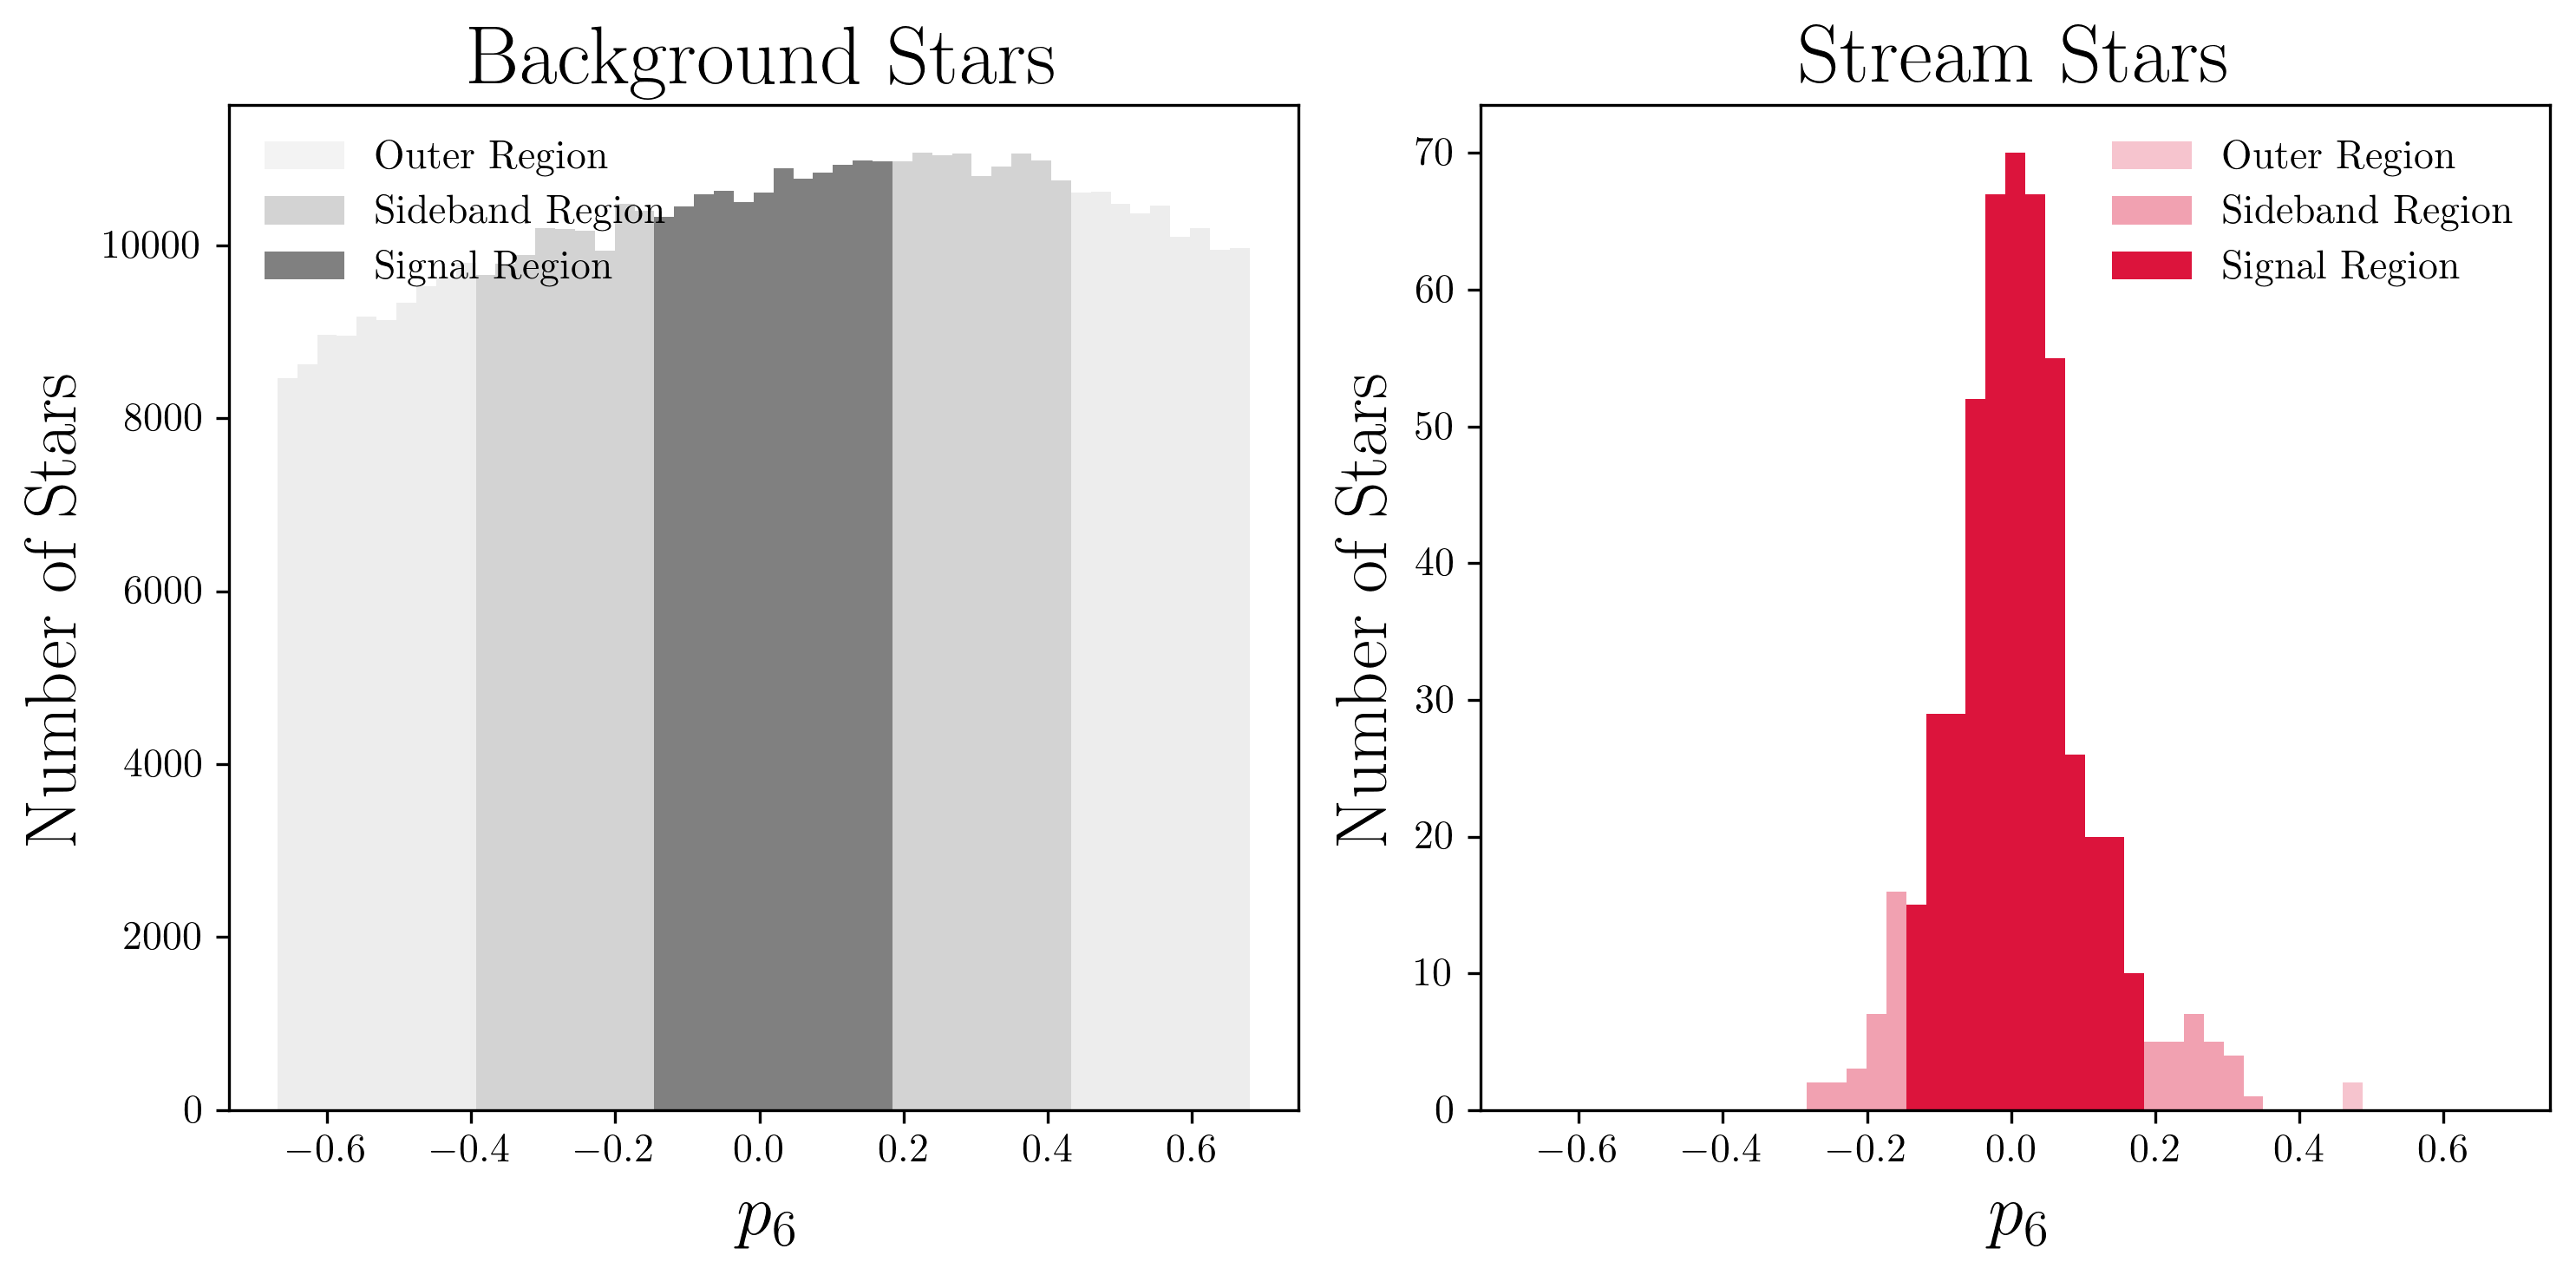

In [44]:
pc_vars = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
df_rot=df.copy()
# df_rot.drop(columns=interest_vars, inplace=True)

new_vars=scaler.transform(df[interest_vars] )
new_vars=new_vars @ sorted_eigenvectors_nn
new_vars_df = pd.DataFrame(new_vars, columns=pc_vars)

new_vars_df.columns=pc_vars
df_rot = pd.concat([df_rot, new_vars_df], axis=1)

### Divide into signal & sideband regions
processor = SignalSideband(df_rot,variable='p6', var_name='$p_6$',sr_factor=1.5, sb_factor=4,process=True)
df_slice = processor.df_slice
processor.plot_sb_data()

## Train

In [45]:
import tensorflow as tf
from tqdm import *
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3" 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [46]:
save_folder = "new_vars"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

2023-09-11 14:54:28.070099: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43670 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:c1:00.0, compute capability: 8.6


1997/1997 [==============================] - 2s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1997/1997 [==============================] - 3s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1997/1997 [==============================] - 2s 755us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1997/1997 [==============================] - 2s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1997/1997 [==============================] - 2s 818us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


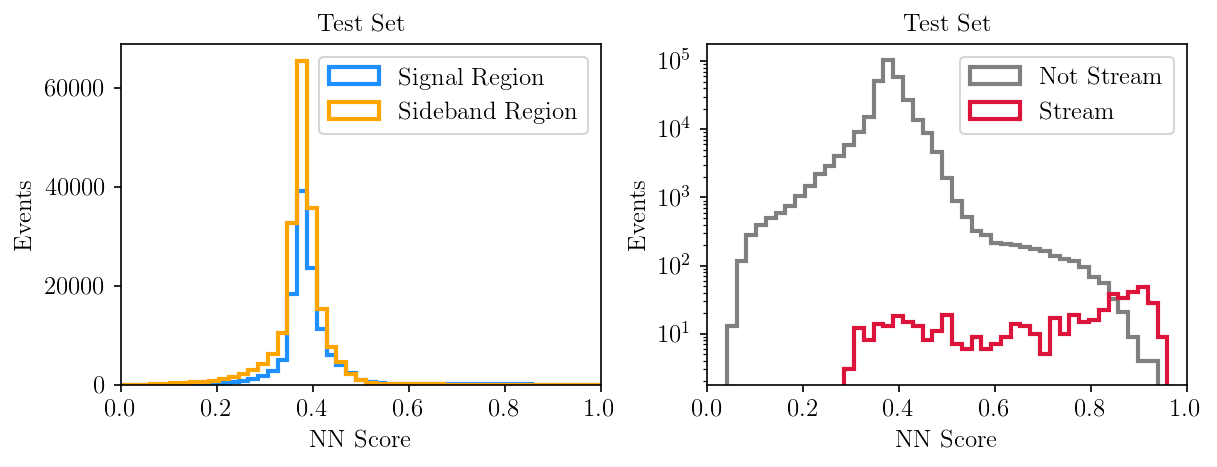

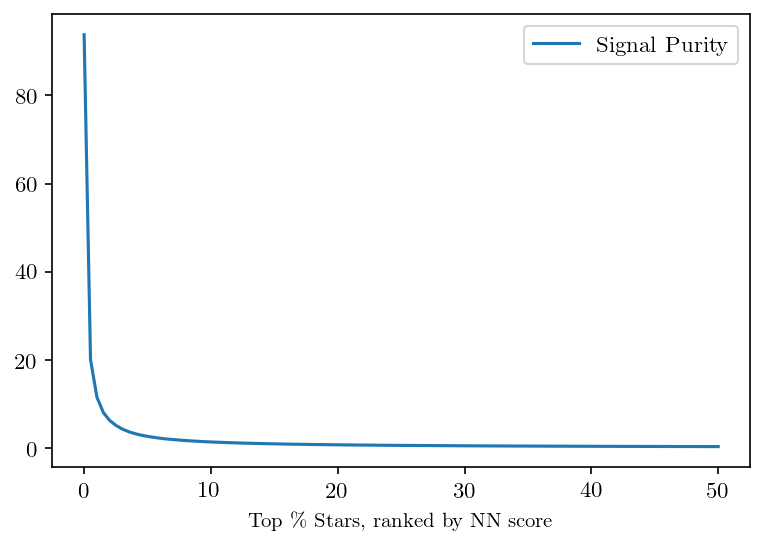

Top 50 stars: Purity = 92.0% 


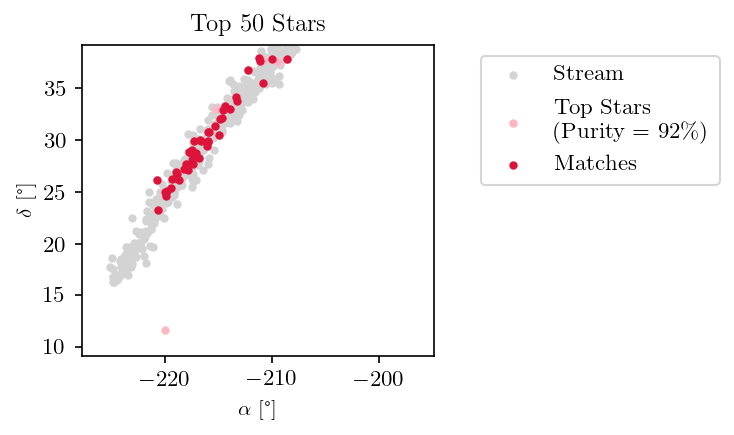

Top 100 stars: Purity = 92.0% 


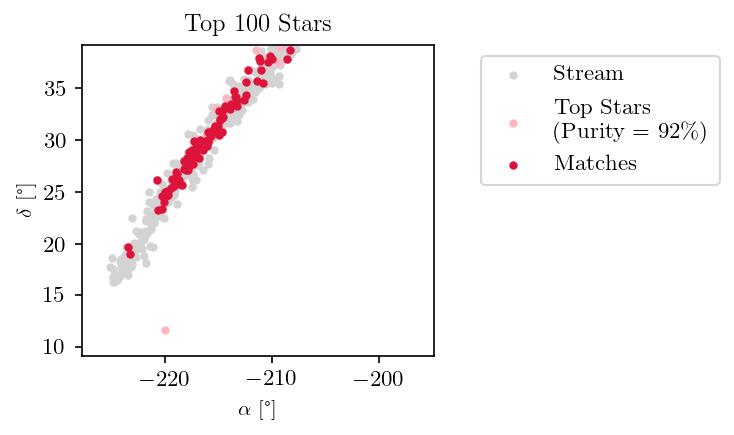

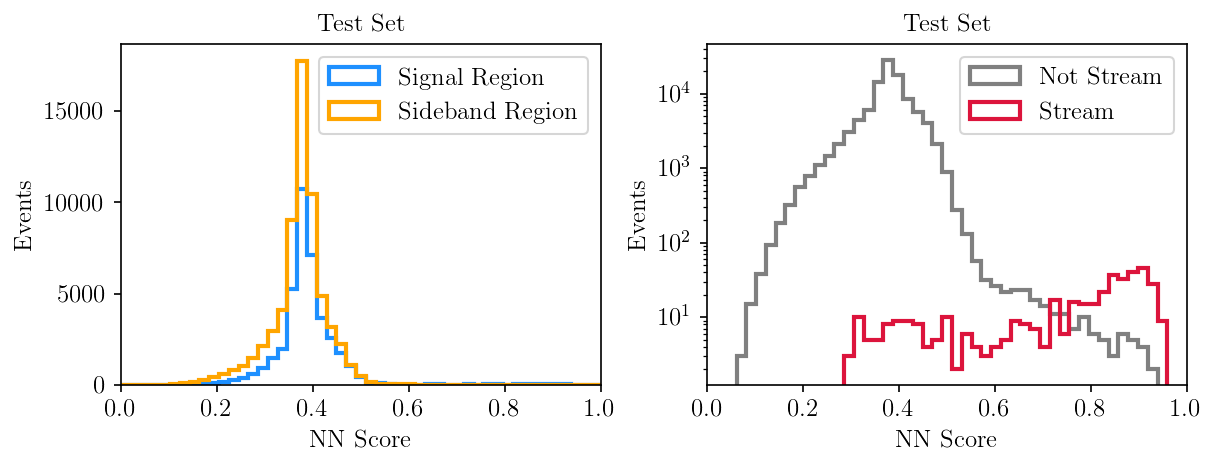

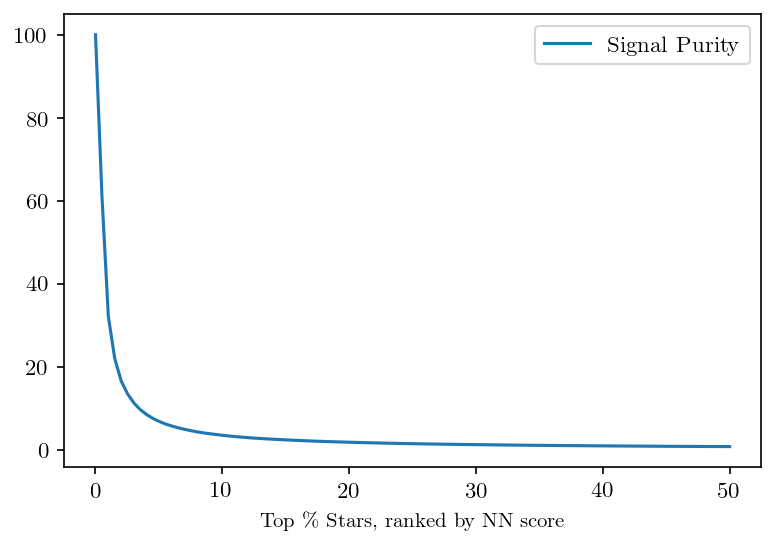

Top 50 stars: Purity = 96.0% 


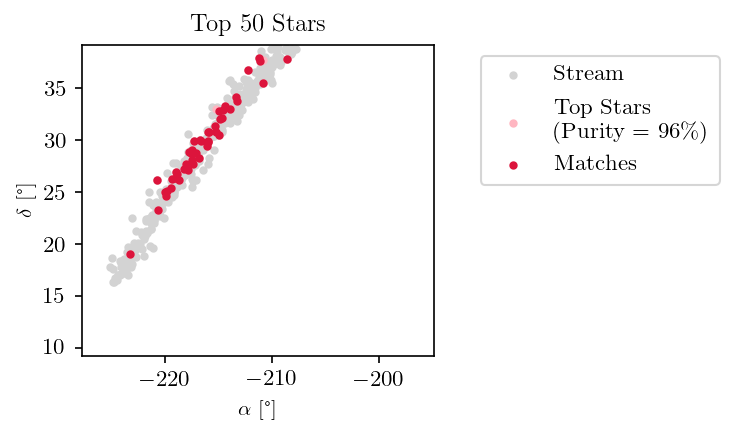

Top 100 stars: Purity = 93.0% 


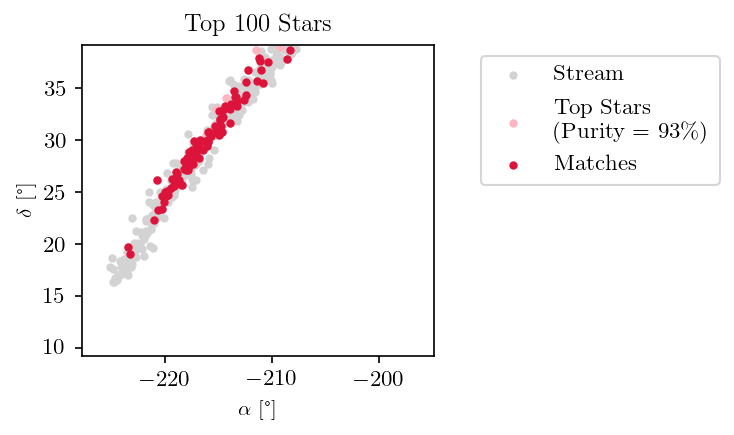

6.0 minutes and 5.030730724334717 seconds


In [48]:
import time
start_time=time.time()
tf.keras.backend.clear_session()
test = train(df_slice, verbose=False, apply_cuts = True, save_folder = save_folder)

dt=time.time()-start_time
mins=dt//60
secs=dt-60*mins
print(f'{mins} minutes and {secs} seconds')

In [23]:
298.2320556640625//60

4.0

Scanning over p5
Sideband region: [-5.8,-1.9) & (1.8,5.7]
Signal region: [-1.9,1.8]
Total counts: SR = 80,182, SB = 185,918
Signal region has 430 stream and 79,752 bkg events (0.54%).
Sideband region has 89 stream and 185,829 bkg events (0.05%).
f_sig = 11.3X f_sideband.


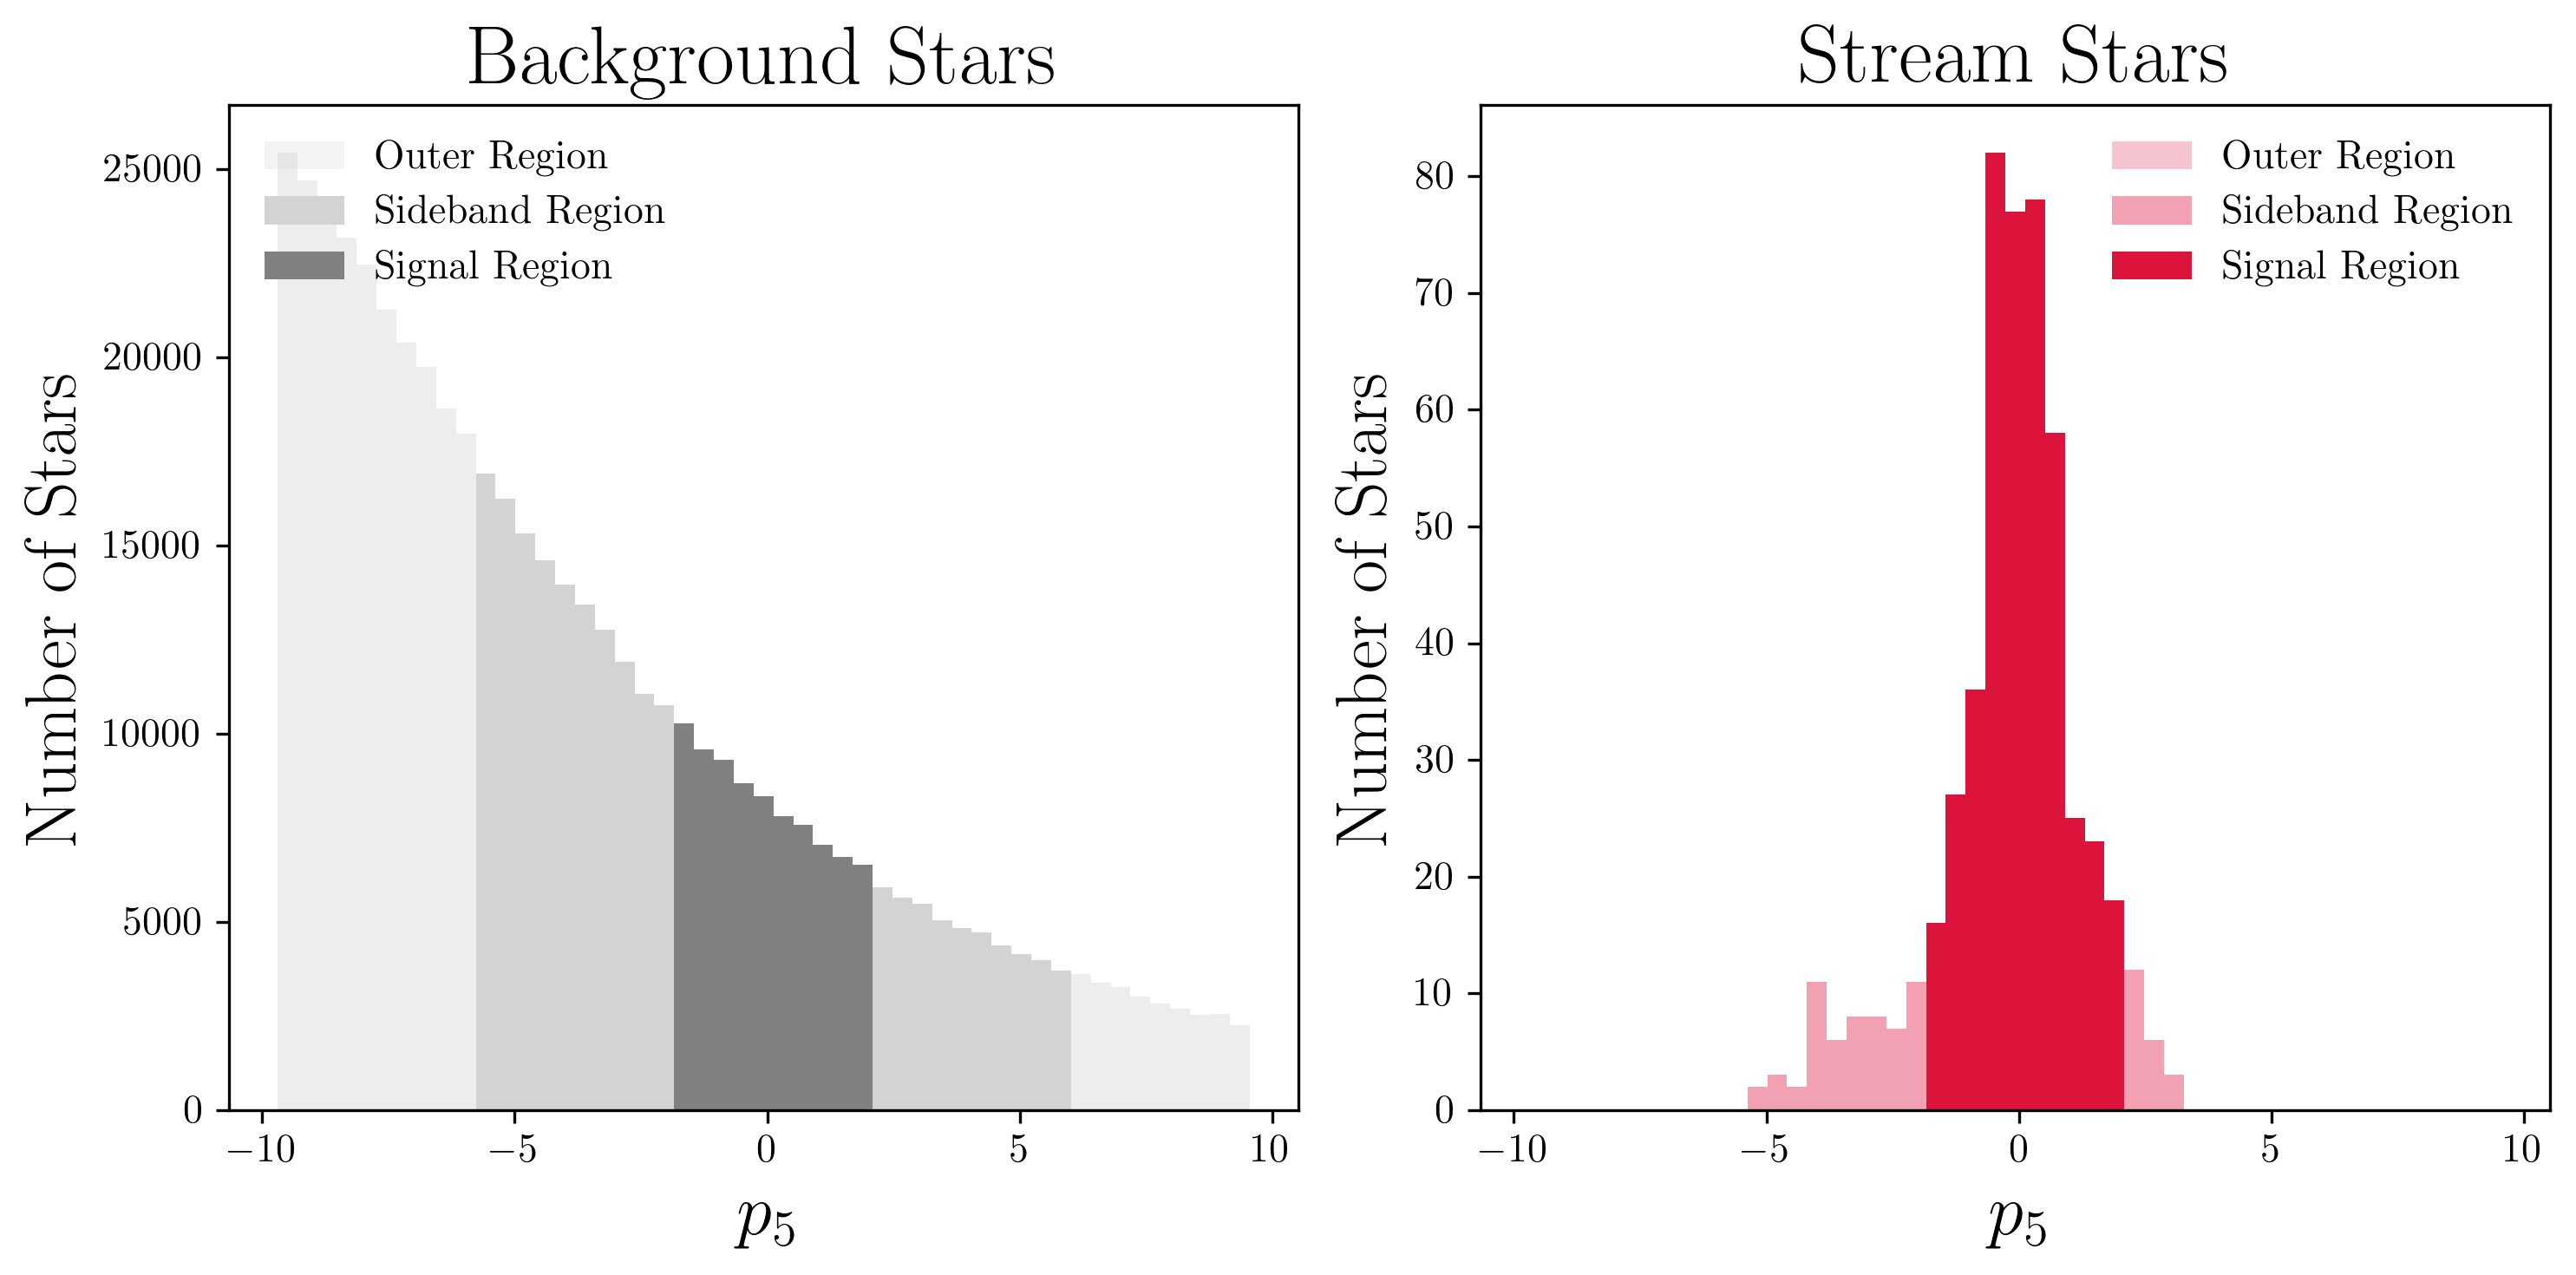

In [77]:
# pc_vars = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
# df_rot=df.copy()
# # df_rot.drop(columns=interest_vars, inplace=True)

# new_vars=scaler.transform(df[interest_vars] )
# new_vars=new_vars @ sorted_eigenvectors_nn
# new_vars_df = pd.DataFrame(new_vars, columns=pc_vars)

# new_vars_df.columns=pc_vars
# df_rot = pd.concat([df_rot, new_vars_df], axis=1)

### Divide into signal & sideband regions
processor = SignalSideband(df_rot,variable='p5', var_name='$p_5$',sr_factor=1.3, sb_factor=4,process=True)
df_slice2 = processor.df_slice
processor.plot_sb_data()

2023-09-11 10:45:22.703928: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 42767 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:c1:00.0, compute capability: 8.6


1664/1664 [==============================] - 2s 912us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1664/1664 [==============================] - 2s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1664/1664 [==============================] - 2s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1664/1664 [==============================] - 1s 800us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1664/1664 [==============================] - 2s 978us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


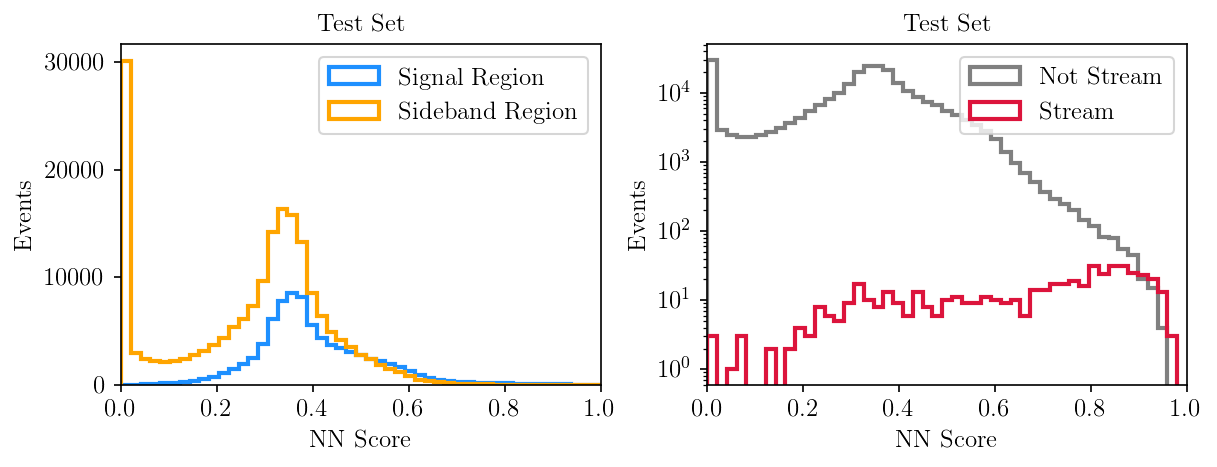

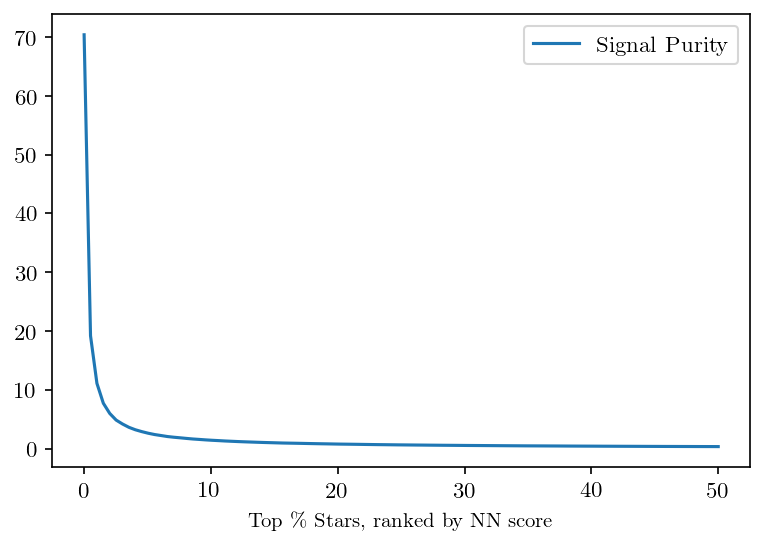

Top 50 stars: Purity = 68.0% 


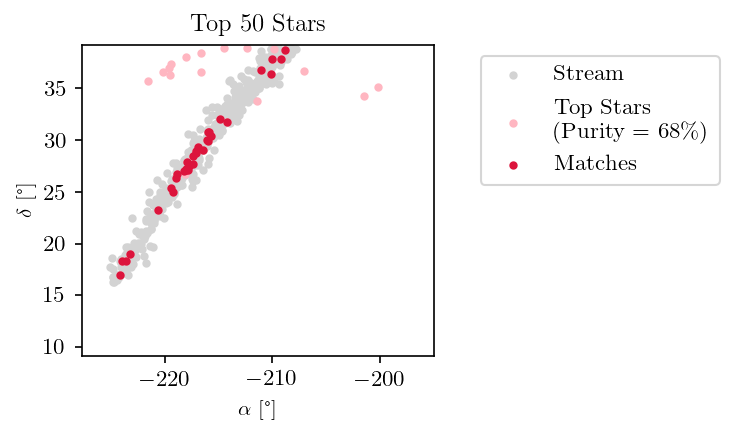

Top 100 stars: Purity = 59.0% 


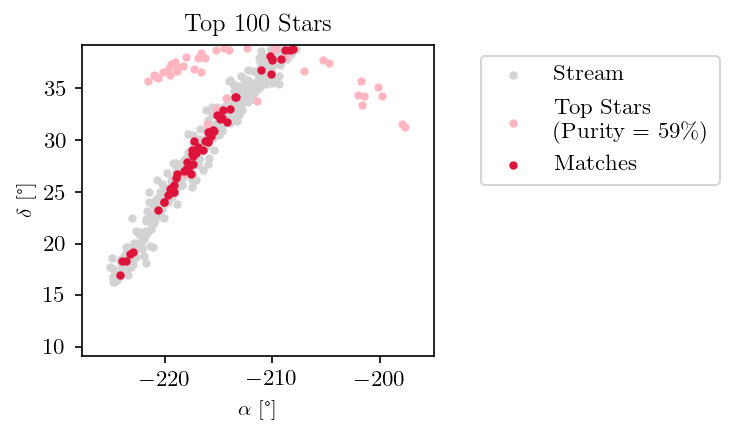

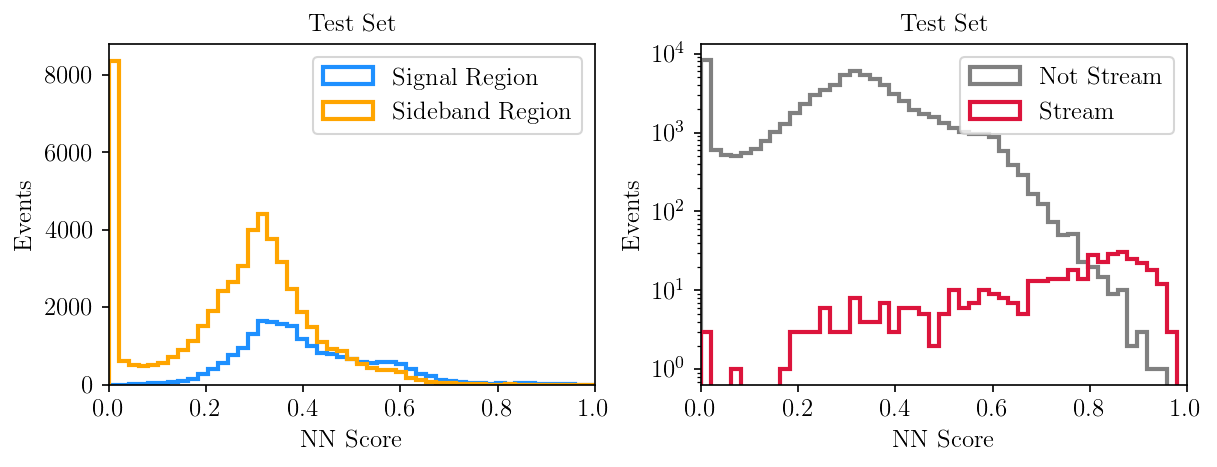

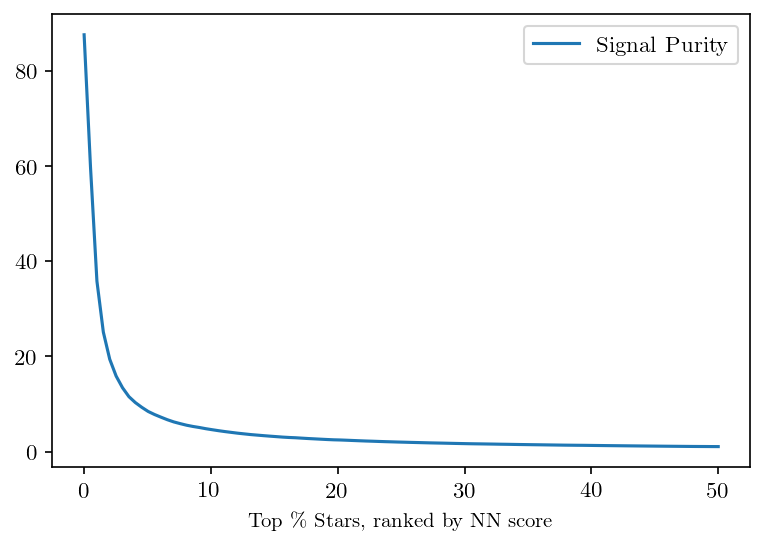

Top 50 stars: Purity = 94.0% 


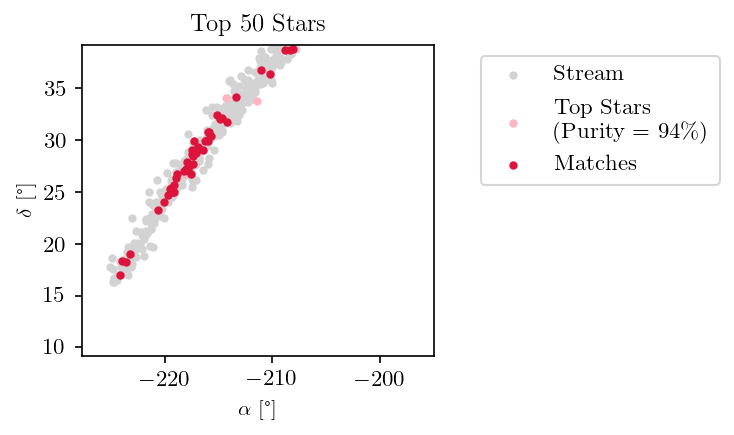

Top 100 stars: Purity = 90.0% 


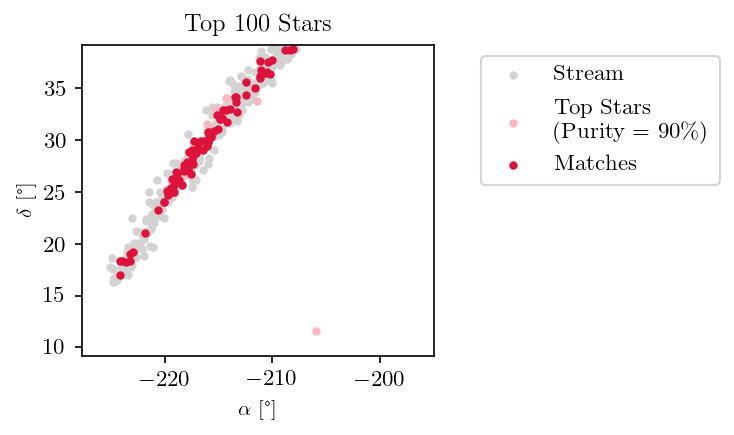

5.0 minutes and 47.21197748184204 seconds


In [79]:
import time
start_time=time.time()
tf.keras.backend.clear_session()
test = train(df_slice2, verbose=False, apply_cuts = True, save_folder = save_folder)

dt=time.time()-start_time
mins=dt//60
secs=dt-60*mins
print(f'{mins} minutes and {secs} seconds')

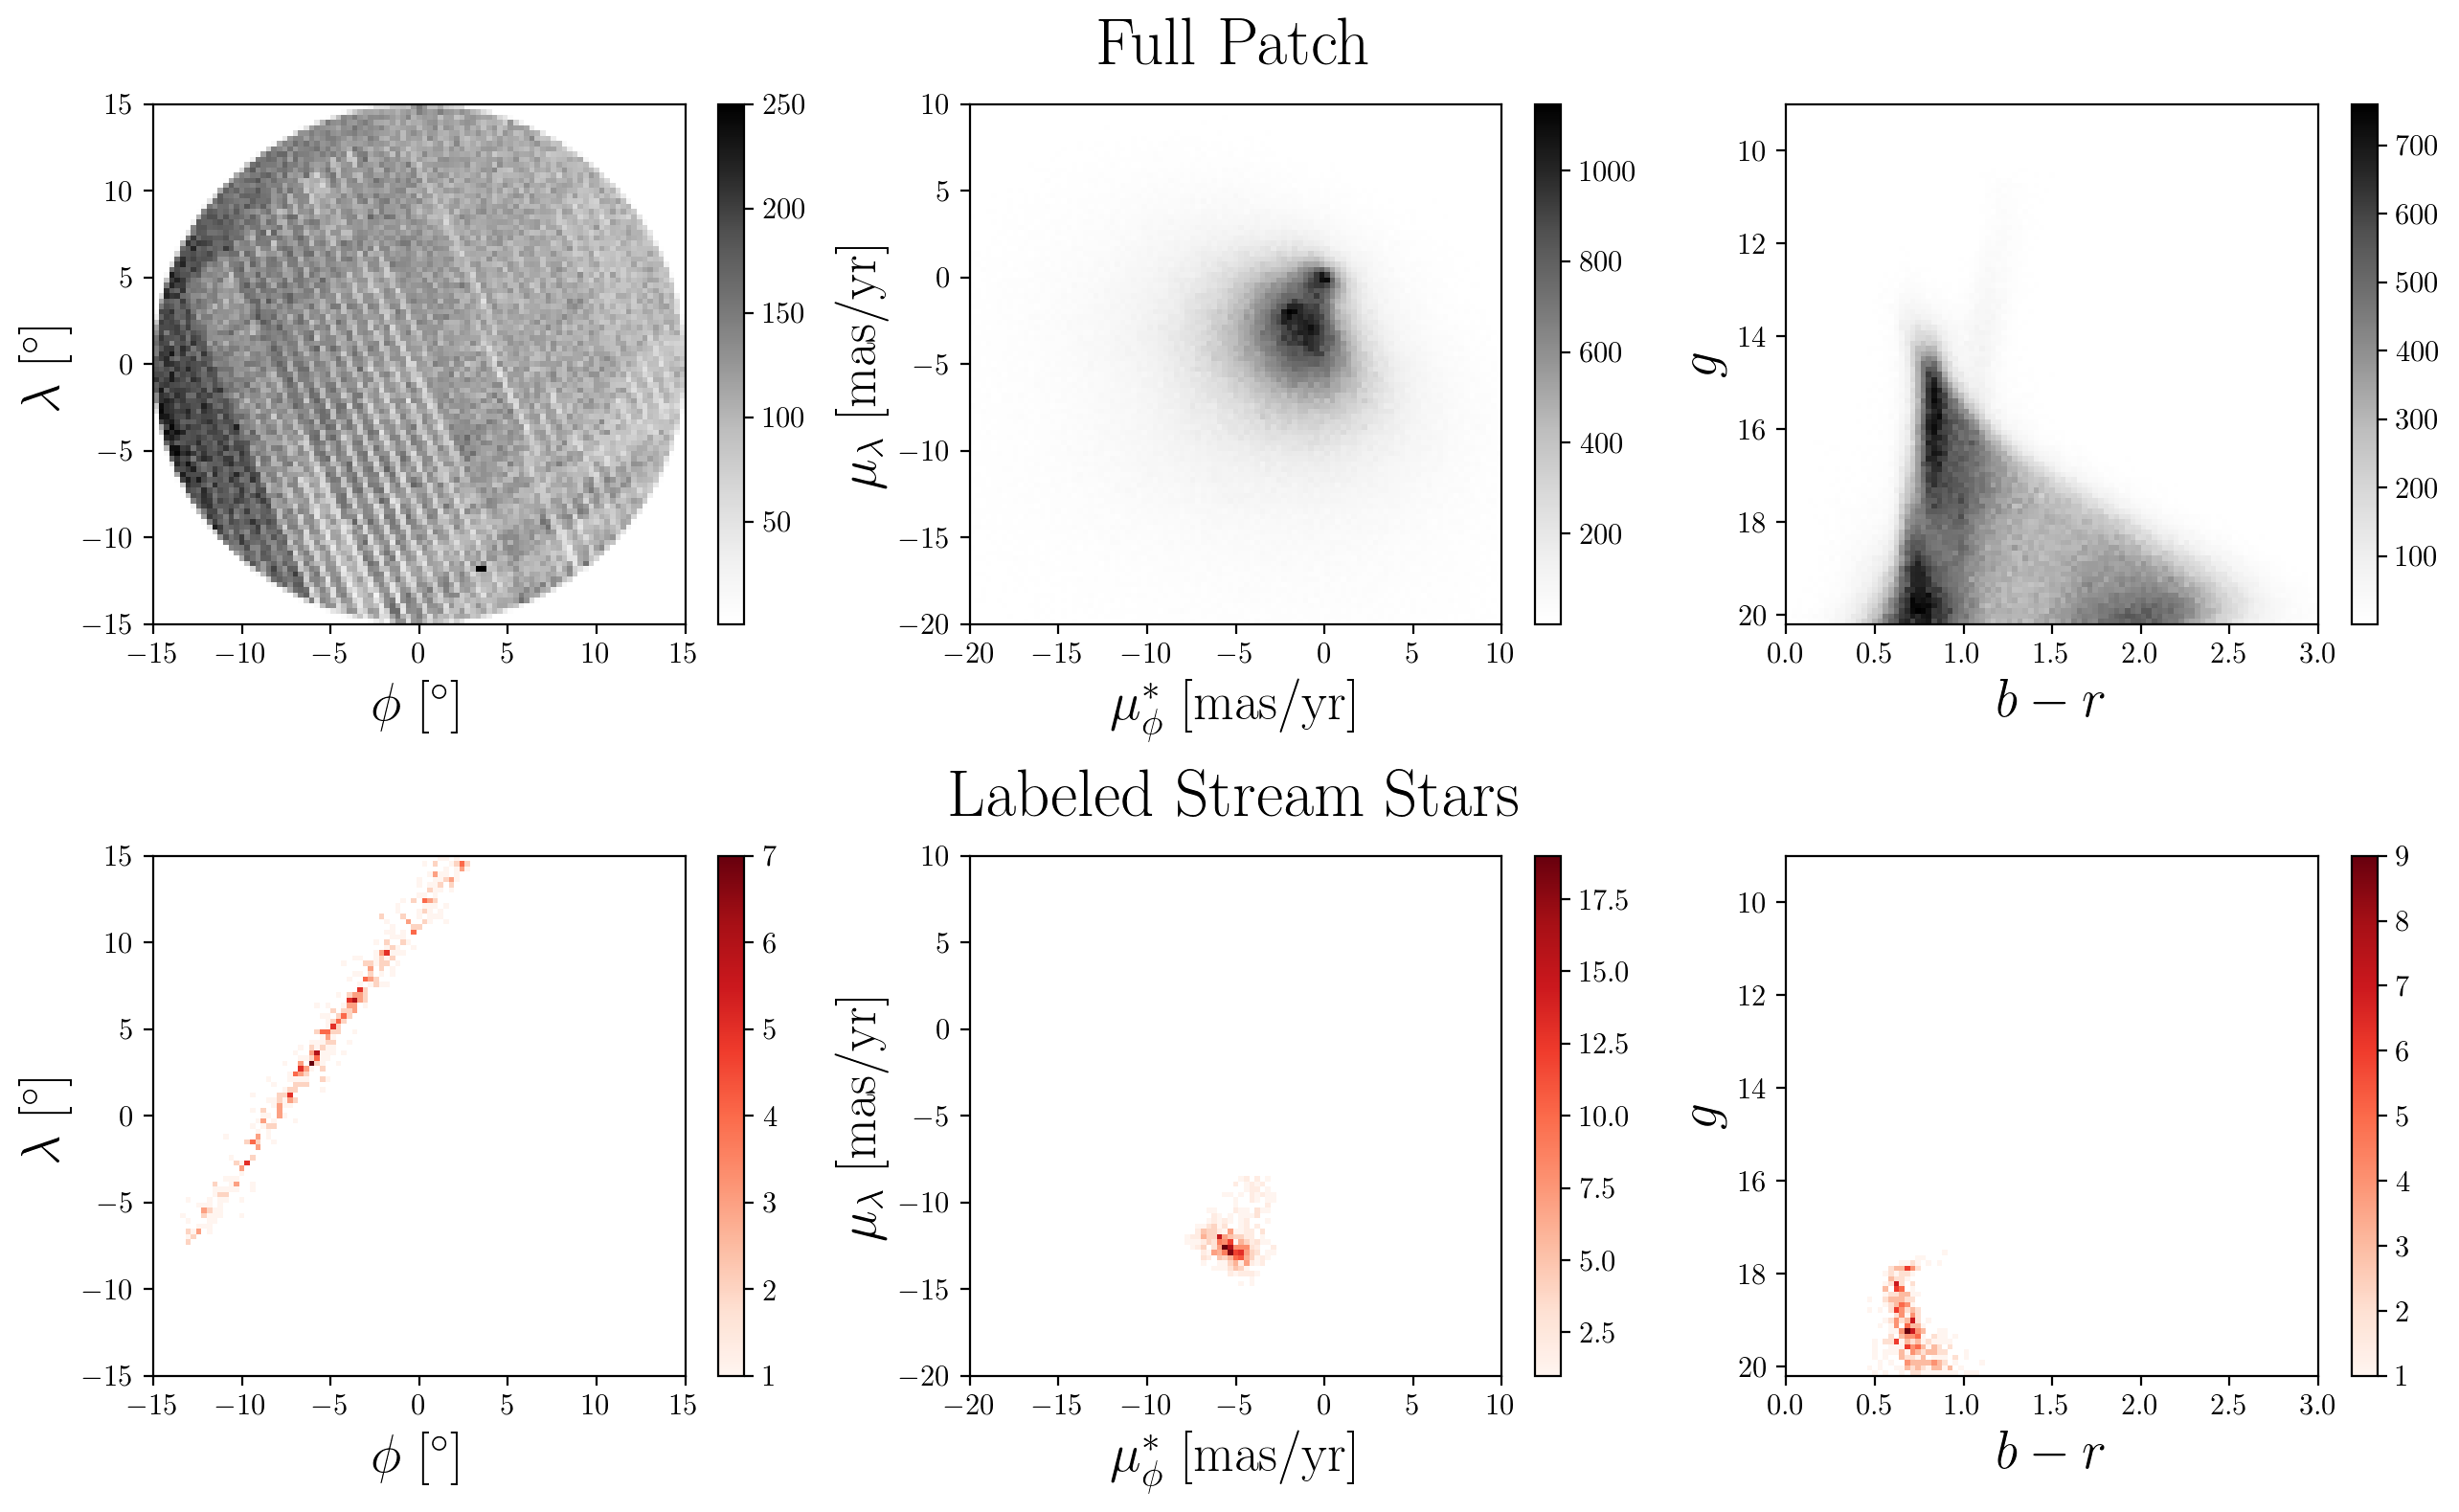

In [4]:
save_folder = "test_gd1_patches"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

dfs = pd.read_hdf("../gaia_data/gd1_1_patch.h5")

make_plots(dfs, save_folder = save_folder)

In [7]:
dfs[dfs['stream']]

μ_δ       μ_α          δ           α       b-r          g  \
786    -12.710315 -3.318680  18.742863  137.237427  0.888437  20.076353   
9856   -12.324957 -4.929947  18.627661  136.763000  0.704645  20.286083   
9974   -12.368648 -2.895427  18.505676  136.164764  0.759855  19.914282   
10905  -12.593509 -3.634944  18.273092  136.355316  0.646955  19.359943   
11265  -13.434429 -3.199581  18.973757  136.690125  0.623697  19.114992   
...           ...       ...        ...         ...       ...        ...   
886834 -12.790280 -3.553750  18.142092  135.824829  0.693872  18.684168   
887334 -12.160713 -5.549022  18.041441  136.037567  0.846668  20.573200   
887678  -9.578933 -2.154275  17.574343  135.094421  0.887125  19.474073   
887914 -11.499810 -4.269228  17.723240  134.844452  0.667967  20.072250   
888375 -12.794545 -1.758022  18.631086  135.039368  0.713970  17.835012   

                ϕ         λ   μ_ϕcosλ        μ_λ  stream   α_wrapped  
786    -10.825115 -4.977279 -4.339457 -12.398986    True  137.237427  
9856   -11.284292 -5.054853 -5.953947 -11.864209    True  136.763000  
9974   -11.862099 -5.127258 -3.981333 -12.062998    True  136.164764  
10905  -11.701794 -5.374863 -4.721927 -12.227538    True  136.355316  
11265  -11.323846 -4.704155 -4.329684 -13.113926    True  136.690125  
...           ...       ...       ...        ...     ...         ...  
886834 -12.217708 -5.460348 -4.704742 -12.413130    True  135.824829  
887334 -12.024525 -5.578869 -6.617176 -11.614111    True  136.037567  
887678 -12.966799 -5.960427 -3.067028  -9.326853    True  135.094421  
887914 -13.190581 -5.789084 -5.376189 -11.025812    True  134.844452  
888375 -12.916744 -4.903563 -2.985101 -12.565039    True  135.039368  

[519 rows x 12 columns]